<img src="ts_wife.jpg" width="400" height="200" align="right"/>

# Time Series Analysis: ARIMA Models

Author: Christoph Güttner


**Abstract**  
Two ARIMA processes - (1,1,1) and (3,1,2) - are  
generated, analysed (autocorrelation and stationarity)  
as well as inter- and extrapolated.  
Therefore daily data of one year (2020) is used to train  
the respective ARIMA Model and predict two further months  
(- March 2021) by i) a complete prediction and ii) a  
rolling forecast(horizont=2)

**AR**: Auto Regression  
**I**: Integrated  
**MA**: Moving Average


## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [ARIMA Process](#Model_Selection)
    * [ARIMA Process(1,1,1)](#ARIMA_Process(1,1,1))
    * [ARIMA Process(3,1,2)](#ARIMA_Process(3,1,2))
      
* [(Partial-) Autocorrelation](#Partial_Autocorrelation)
* [Dickey Fuller Test](#Dickey_Fuller_Test)
  
* [ARIMA Model](#ARIMA_Model)
    * [ARIMA Model(1,1)](#ARMA_Model(1,1,1))
    * [ARIMA Model(3,2)](#ARMA_Model(3,1,2))
      
* [Model Predictions](#ARIMA_Model_Predictions)
    * [Predictions ARIMA (1,1,1)](#Predictions_ARMA(1,1,1))
    * [Predictions ARIMA Model(3,1,2)](#Predictions_ARMA(3,1,2))
* [Rolling Forecast](#ARMA_Rolling_Forecast)
    * [Rolling Forecast ARIMA(1,1,1)](#ARIMA(1,1,1)_horizont2)
    * [Rolling Forecast ARIMA(3,1,2)](#ARIMA(3,1,2)_horizont2)

## Class Imports

In [265]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_predict

In [266]:
#functions
def generate_ARMA(p, q, a, b, c, sigma, y, n_samples):
    y = np.float64(np.zeros(n_samples))
    epsilon = np.float64(np.zeros(n_samples))

    for t in range(p, n_samples):
        sum = 0.0
        for i in range(1,p+1):
            sum += a[i-1] * y[t-i]
        for j in range(1,q+1):
            epsilon[t-j] = np.float64(np.random.normal(0.0, sigma))
            sum += b[j-1] * epsilon[t-j]
        epsilon[t] = np.float64(np.random.normal(0.0, sigma))
        y[t] = np.float64(c) + np.float64(epsilon[t]) + sum

    return y

def get_integration(ts):
    integrated = np.cumsum(np.array(ts))
    return integrated

def get_integration_order(ts, n_order):
    for i in range(n_order):
        ts = np.cumsum(np.array(ts))
    return ts


def dickey_fuller(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")


def rolling_forecast_ARIMA111(df, train_len, test_len):
    start = df.iloc[train_len, [0]]
    rolling_predictions = [start]
    for i in range(test_len-1):
        train = df.iloc[:(train_len+i), [0]]
        model = ARIMA(train, order=(1,1,1))
        model_fit = model.fit()
        pred = model_fit.forecast(horizon=2)
        rolling_predictions.append(pred.values[0])
    return np.array(rolling_predictions).astype(float)

def rolling_forecast_ARIMA312(df, train_len, test_len):
    start = df.iloc[train_len, [0]]
    rolling_predictions = [start]
    for i in range(test_len-1):
        train = df.iloc[:(train_len+i), [0]]
        model = ARIMA(train, order=(3,1,2))
        model_fit = model.fit()
        pred = model_fit.forecast(horizon=2)
        rolling_predictions.append(pred.values[0])
    return np.array(rolling_predictions).astype(float)

## ARIMA_Process

In [267]:
date_index = pd.date_range(start='1/1/2020', end='3/1/2021')

 
### ARIMA(1,1,1)_Process:
   
$y_{t} = \epsilon_{t} + 0.75 * y_{t-1} + 0.02 * \epsilon_{t-1}$




In [268]:
p=1
q=1
a=[0.75]
b=[0.02]
c=0.0
y=0
sigma = 1.0
n_samples = len(date_index)

np.random.seed(1)
ARMA_Process11 = generate_ARMA(p, q, a, b, c, sigma, y, n_samples)

### Integration_order1

In [269]:
ARMA_Process111 = get_integration_order(ARMA_Process11, 1)

In [270]:
data11={'TS_111':ARMA_Process111}
df11 = pd.DataFrame(data11, index=date_index)
df11.head(3)

,TS_111
2020-01-01,0.000000
2020-01-02,-0.579270
2020-01-03,-2.097254


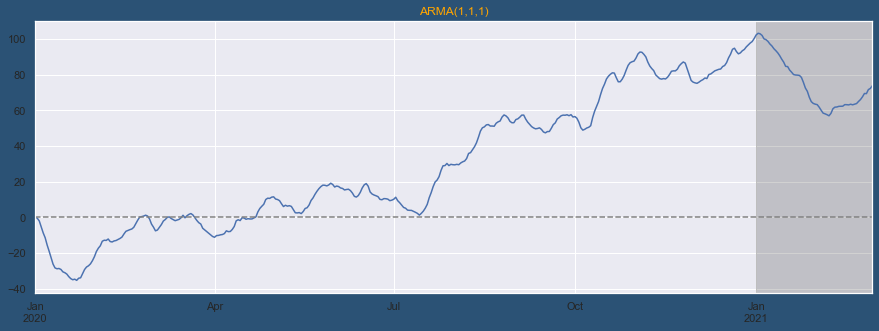

In [294]:
plt.figure(facecolor='#2B5275')
df11['TS_111'].plot(figsize=(15,5))
plt.axhline(0, linestyle='--', color='grey')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.title('ARMA(1,1,1)', color='orange')
plt.show()


### ARIMA(3,1,2) Process:  
  
$ y_{t} =\epsilon_{t} + 0.35 * y_{t-1} + 0.16 * y_{t-2} + 0.3* y_{t-3} + 0.02 *\epsilon_{t-1} + 0.07 *\epsilon_{t-2} $

In [272]:
p=3
q=2
a=[0.35, 0.16, 0.3]
b=[0.02, 0.07]
c=0.0
y=0
sigma = 1.0
n_samples = len(date_index)

np.random.seed(4)
ARMA_Process32 = generate_ARMA(p, q, a, b, c, sigma, y, n_samples)


### Integration_order1

In [273]:
ARMA_Process312 = get_integration(ARMA_Process32)


In [274]:
data32={'TS_312':ARMA_Process312}
df32 = pd.DataFrame(data32, index=date_index)
df32.head(3)

,TS_312
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0


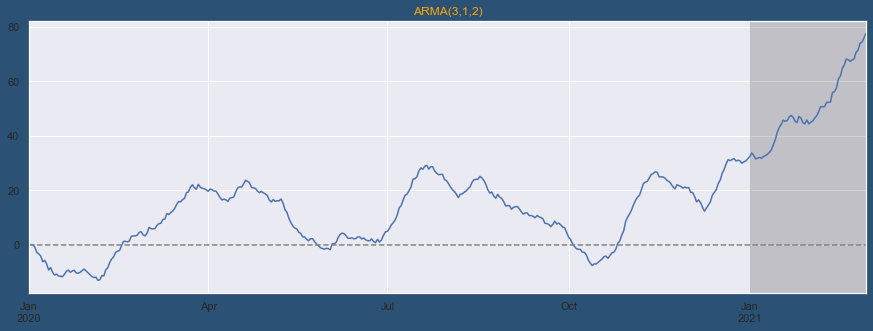

In [275]:
plt.figure(facecolor='#2B5275')
df32['TS_312'].plot(figsize=(15,5))
plt.axhline(0, linestyle='--', color='grey')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.title('ARIMA(3,1,2)', color='orange')
plt.show()

## Dickey_Fuller_Test_of_first_difference

Testing for stationarity of first difference
### For ARIMA(1,1,1) Process

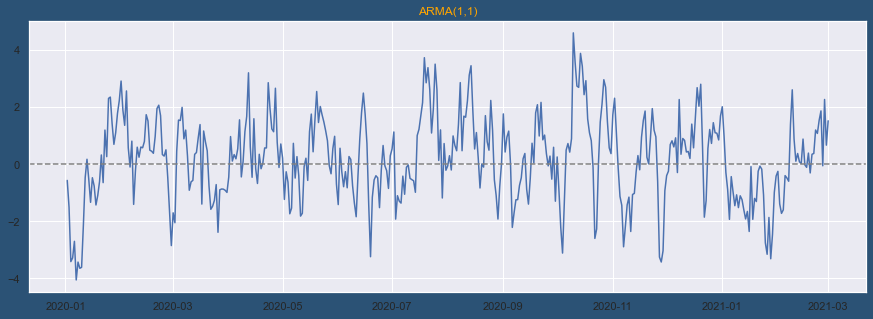

In [300]:
plt.figure(facecolor='#2B5275', figsize=(15,5))
plt.plot(first_diff11)
plt.axhline(0, linestyle='--', color='grey')
plt.title('ARMA(1,1)', color='orange')
plt.show()

In [276]:
first_diff11 = df11['TS_111'].diff().dropna()
dickey_fuller(first_diff11)

ADF Statistic: -7.943117
p-value: 0.000000
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


### For ARMA(3,2) Process

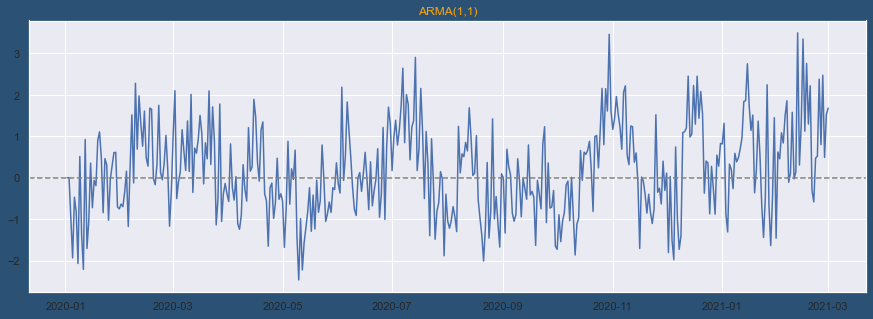

In [301]:
plt.figure(facecolor='#2B5275', figsize=(15,5))
plt.plot(first_diff32)
plt.axhline(0, linestyle='--', color='grey')
plt.title('ARMA(1,1)', color='orange')
plt.show()

In [277]:
first_diff32=df32['TS_312'].diff().dropna()
dickey_fuller(first_diff32)

ADF Statistic: -5.595060
p-value: 0.000001
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


## (Partial-)_Autocorrelation

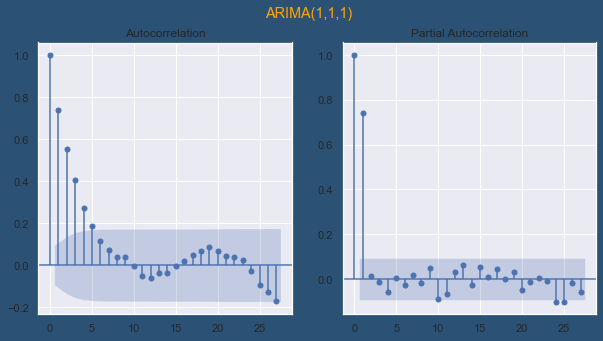

In [278]:
fig = plt.figure(figsize=(10,5),facecolor='#2B5275')
fig.suptitle('ARIMA(1,1,1)', color ='orange')
ax = fig.add_subplot(1,2,1)
plot_acf(first_diff11, ax=ax)
ax = fig.add_subplot(1,2,2)
plot_pacf(first_diff11, ax=ax)
plt.show()

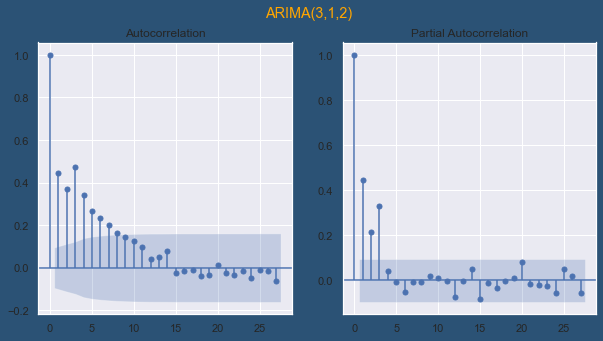

In [279]:
fig = plt.figure(figsize=(10,5),facecolor='#2B5275')
fig.suptitle('ARIMA(3,1,2)', color ='orange')
ax = fig.add_subplot(1,2,1)
plot_acf(first_diff32, ax=ax)
ax = fig.add_subplot(1,2,2)
plot_pacf(first_diff32, ax=ax)
plt.show()

## ARIMA_Model_Prediction

### Train Test Split

In [280]:
df_train111 = df11['TS_111']['1/1/2020':'1/1/2021']
df_test111 = df11['TS_111']['1/1/2021':'3/1/2021']

df_train312 = df32['TS_312']['1/1/2020':'1/1/2021']
df_test312 = df32['TS_312']['1/1/2021':'3/1/2021']

In [281]:
train_len = len(df_train111)
test_len = len(df_test111)

## ARIMA(1,1,1)_Model

In [282]:
model11 = ARIMA(df_train111, order=(1,1,1))
model_fit11 = model11.fit()
print(model_fit11.summary())


                               SARIMAX Results                                
Dep. Variable:                 TS_111   No. Observations:                  367
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -524.520
Date:                Fri, 12 Mar 2021   AIC                           1055.040
Time:                        15:13:38   BIC                           1066.747
Sample:                    01-01-2020   HQIC                          1059.692
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7361      0.050     14.734      0.000       0.638       0.834
ma.L1          0.0117      0.070      0.167      0.868      -0.126       0.149
sigma2         1.0265      0.072     14.166      0.0

## ARMA(3,2)_Model

In [283]:
model312 = ARIMA(df_train312, order=(3,1,2))
model_fit312 = model312.fit()
print(model_fit312.summary())


                               SARIMAX Results                                
Dep. Variable:                 TS_312   No. Observations:                  367
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -465.071
Date:                Fri, 12 Mar 2021   AIC                            942.142
Time:                        15:13:38   BIC                            965.558
Sample:                    01-01-2020   HQIC                           951.447
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4234      0.191      2.221      0.026       0.050       0.797
ar.L2          0.0032      0.207      0.015      0.988      -0.402       0.409
ar.L3          0.3294      0.069      4.782      0.0

## Model_Prediction

<Figure size 432x288 with 0 Axes>

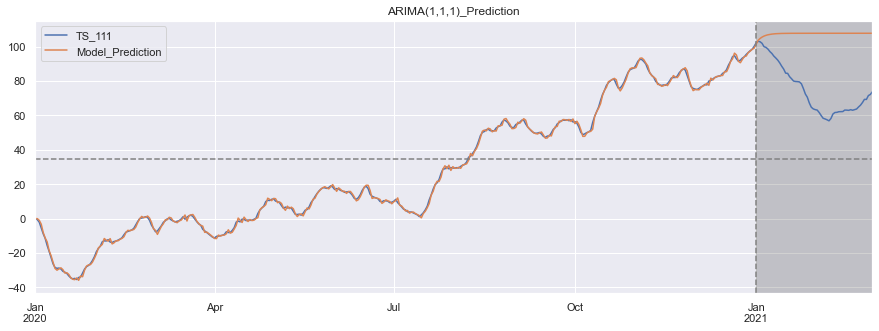

In [284]:
prediction_pred = model_fit11.predict(start='1/1/2020', end='3/1/2021')
prediction_pred = pd.Series(prediction_pred, index=df11.index)
#prediction_pred = get_integration(prediction_pred)
df11['Model_Prediction'] = prediction_pred

plt.figure(facecolor='#2B5275')
df11.plot(figsize=(15,5))
#ax.set_facecolor('#457277')
plt.axhline(df11['TS_111'].mean(), linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.title('ARIMA(1,1,1)_Prediction')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.show()



<Figure size 432x288 with 0 Axes>

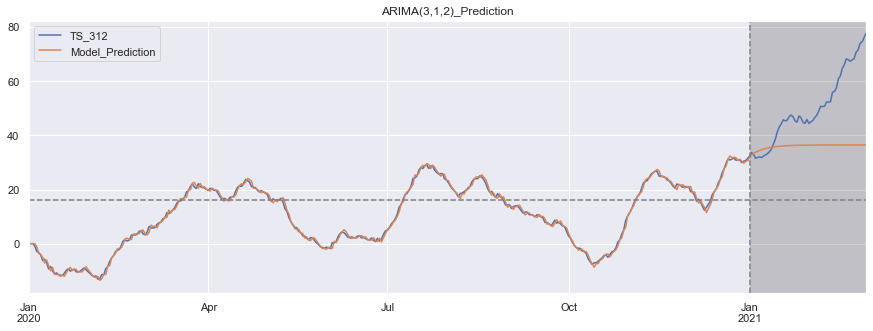

In [285]:
prediction_pred = model_fit312.predict(start='1/1/2020', end='3/1/2021')
prediction_pred = pd.Series(prediction_pred, index=df32.index)
df32['Model_Prediction'] = prediction_pred

plt.figure(facecolor='#2B5275')
df32.plot(figsize=(15,5))
plt.axhline(df32['TS_312'].mean(), linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.title('ARIMA(3,1,2)_Prediction')
plt.show()

## Rolling_Forecast

Rolling forecast with a horizont of 2 timesteps ahead.

### ARIMA(1,1,1)_horizont2

In [286]:
rolling_prediction111= rolling_forecast_ARIMA111(df11, train_len, test_len)

<ipython-input-266-e7c4042d134d>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rolling_predictions).astype(float)


In [287]:
rolling_prediction111 = {'Rolling_Forecast2':rolling_prediction111}
df_rolling_prediction111 = pd.DataFrame(rolling_prediction111, index=df_test111.index)
#df_horizont111 = df_rolling_prediction111.join(df11.iloc[train_len:,[0]])
df_horizont111=pd.concat([df11.iloc[:,[0]], df_rolling_prediction111], axis=1)

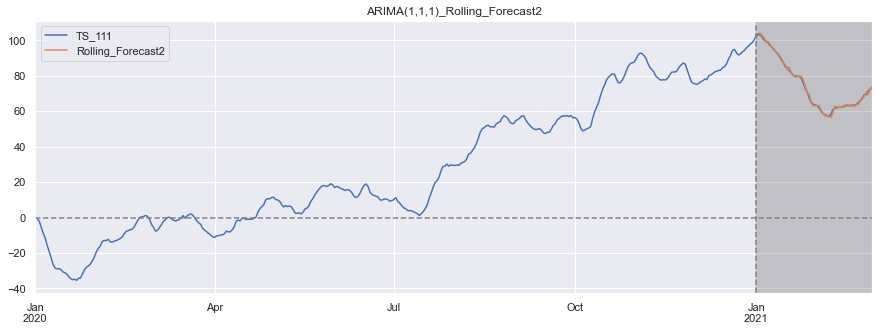

In [293]:
df_horizont111.plot(figsize=(15,5))
plt.axhline(0, linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.title('ARIMA(1,1,1)_Rolling_Forecast2')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.show()

### ARIMA(3,1,2)_horizont2

In [290]:
rolling_prediction312= rolling_forecast_ARIMA312(df32, train_len, test_len)

<ipython-input-266-e7c4042d134d>:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rolling_predictions).astype(float)


In [291]:
rolling_prediction312 = {'Rolling_Forecast2':rolling_prediction312}
df_rolling_prediction312 = pd.DataFrame(rolling_prediction312, index=df_test312.index)
df_horizont312=pd.concat([df32.iloc[:,[0]], df_rolling_prediction312], axis=1)

<Figure size 432x288 with 0 Axes>

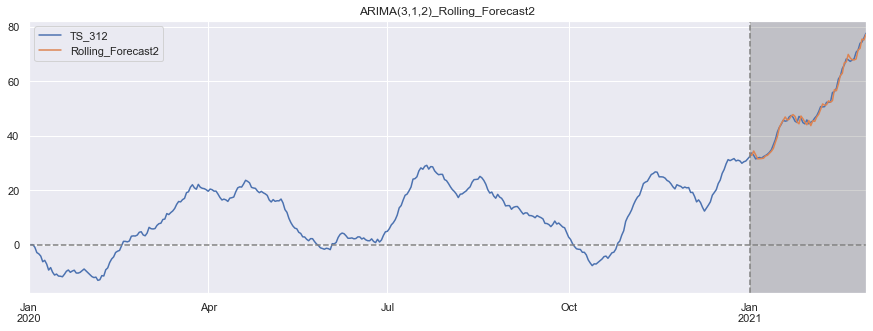

In [292]:
plt.figure(facecolor='#2B5275')
df_horizont312.plot(figsize=(15,5))
#ax.set_facecolor('#457277')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline('1/1/2021',linestyle='--', color='grey')
plt.title('ARIMA(3,1,2)_Rolling_Forecast2')
plt.axvspan('1/1/2021', '3/1/2021', color='k', alpha=0.2)
plt.show()